In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the processed dataset
df_clean = pd.read_csv('churn_processed.csv')

# Separate features and target
X = df_clean.drop('Exited', axis=1)
y = df_clean['Exited']

# Split the data into training and test sets (70% train, 30% test) - same as previous tasks
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling - crucial for neural networks
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
# Define the parameter grid for Neural Network (MLP)
param_grid = {
    'hidden_layer_sizes': [(10,), (20,), (50,), (100,), (10, 10), (20, 10)],  # Network architecture
    'activation': ['relu', 'tanh'],                                         # Activation function
    'alpha': [0.0001, 0.001, 0.01],                                         # L2 regularization
    'learning_rate_init': [0.001, 0.01],                                    # Initial learning rate
    'max_iter': [200, 500]                                                  # Maximum iterations
}

# Explanation of hyperparameters:
# Hyperparameter search explanation
# hidden_layer_sizes: Defines the architecture (neurons in each hidden layer
# activation: Activation function for hidden layers (relu = Rectified Linear Unit, tanh = Hyperbolic Tangent)
# alpha: L2 regularization parameter to prevent overfitting
# learning_rate_init: Initial learning rate for weight updates
# max_iter: Maximum number of iterations for convergence

In [4]:
# Create the GridSearchCV object for neural network
grid_search_nn = GridSearchCV(
    estimator=MLPClassifier(random_state=42, early_stopping=True, validation_fraction=0.1, verbose=True),
    param_grid=param_grid,
    cv=3,                    # 3-fold cross-validation (reduced from 5 since NN is computationally intensive)
    scoring='accuracy',      # Use accuracy as the scoring metric
    n_jobs=-1,               # Use all available CPU cores
    verbose=1                # Show progress
)

In [5]:
# Perform the grid search
print("\nStarting Grid Search for Neural Network optimization...")
grid_search_nn.fit(X_train_scaled, y_train)

# Get the best parameters and best estimator
print("\nBest Parameters:")
print(grid_search_nn.best_params_)


Starting Grid Search for Neural Network optimization...
Fitting 3 folds for each of 144 candidates, totalling 432 fits
Iteration 1, loss = 0.40487021
Validation score: 0.952857
Iteration 2, loss = 0.13453731
Validation score: 0.957143
Iteration 3, loss = 0.11148727
Validation score: 0.957143
Iteration 4, loss = 0.10754915
Validation score: 0.955714
Iteration 5, loss = 0.10670289
Validation score: 0.955714
Iteration 6, loss = 0.10583234
Validation score: 0.955714
Iteration 7, loss = 0.10529085
Validation score: 0.955714
Iteration 8, loss = 0.10462780
Validation score: 0.955714
Iteration 9, loss = 0.10357457
Validation score: 0.955714
Iteration 10, loss = 0.10323840
Validation score: 0.955714
Iteration 11, loss = 0.10287716
Validation score: 0.955714
Iteration 12, loss = 0.10249774
Validation score: 0.955714
Iteration 13, loss = 0.10185335
Validation score: 0.955714
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.

Best Parameters:
{'activatio

In [6]:
# Use the best model
nn_best = grid_search_nn.best_estimator_

# Evaluate on training and test sets
y_train_pred_nn = nn_best.predict(X_train_scaled)
y_test_pred_nn = nn_best.predict(X_test_scaled)

train_accuracy_nn = accuracy_score(y_train, y_train_pred_nn)
test_accuracy_nn = accuracy_score(y_test, y_test_pred_nn)

print("\nNeural Network Performance:")
print(f"Training Accuracy: {train_accuracy_nn:.4f}")
print(f"Test Accuracy: {test_accuracy_nn:.4f}")


Neural Network Performance:
Training Accuracy: 0.9704
Test Accuracy: 0.9660


In [7]:
# Check for overfitting
print("\nOverfitting Check:")
print(f"Accuracy difference (Train - Test): {train_accuracy_nn - test_accuracy_nn:.4f}")
if train_accuracy_nn - test_accuracy_nn > 0.05:
    print("Possible overfitting: Training accuracy is significantly higher than test accuracy")
else:
    print("No strong evidence of overfitting: Training and test accuracies are similar")


Overfitting Check:
Accuracy difference (Train - Test): 0.0044
No strong evidence of overfitting: Training and test accuracies are similar


In [8]:
# Check convergence
print("\nConvergence Check:")
print(f"Best model iterations: {nn_best.n_iter_}")
print(f"Maximum iterations allowed: {nn_best.max_iter}")
if nn_best.n_iter_ < nn_best.max_iter:
    print("The model converged before reaching maximum iterations")
else:
    print("The model reached maximum iterations without convergence")


Convergence Check:
Best model iterations: 13
Maximum iterations allowed: 200
The model converged before reaching maximum iterations


In [9]:
# Display model details
print("\nBest Neural Network architecture:")
print(f"Hidden layer sizes: {nn_best.hidden_layer_sizes}")
print(f"Activation function: {nn_best.activation}")
print(f"Alpha (L2 regularization): {nn_best.alpha}")
print(f"Learning rate: {nn_best.learning_rate_init}")
print(f"Solver: {nn_best.solver}")


Best Neural Network architecture:
Hidden layer sizes: (10,)
Activation function: tanh
Alpha (L2 regularization): 0.0001
Learning rate: 0.01
Solver: adam


In [10]:
# Get the top 5 features from the best decision tree model (Task 2)
top_dt_features = ['ComplaintsLodged', 'Age', 'NumOfProducts']

print("\nTop features from best decision tree model:")
for feature in top_dt_features:
    print(f"- {feature}")

# Create reduced dataset with only these features
X_train_reduced = X_train[top_dt_features]
X_test_reduced = X_test[top_dt_features]

# Apply scaling to the reduced feature set
X_train_reduced_scaled = scaler.fit_transform(X_train_reduced)
X_test_reduced_scaled = scaler.transform(X_test_reduced)

print("\nReduced dataset prepared:")
print(f"Training set shape: {X_train_reduced_scaled.shape}")
print(f"Test set shape: {X_test_reduced_scaled.shape}")


Top features from best decision tree model:
- ComplaintsLodged
- Age
- NumOfProducts

Reduced dataset prepared:
Training set shape: (7000, 3)
Test set shape: (3000, 3)


In [22]:
# Define parameter grid for reduced neural network
param_grid_reduced = {
    'hidden_layer_sizes': [(5,), (10,), (20,), (5, 5), (10, 5)],  # Smaller architectures for fewer inputs
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [200, 500]
}


In [23]:
# Create the GridSearchCV object for reduced neural network
grid_search_nn_reduced = GridSearchCV(
    estimator=MLPClassifier(random_state=42, early_stopping=True, validation_fraction=0.1),
    param_grid=param_grid_reduced,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

In [24]:
# Perform the grid search on reduced feature set
print("\nStarting Grid Search for reduced Neural Network...")
grid_search_nn_reduced.fit(X_train_reduced_scaled, y_train)

# Get the best parameters and best estimator
print("\nBest Parameters for reduced Neural Network:")
print(grid_search_nn_reduced.best_params_)


Starting Grid Search for reduced Neural Network...
Fitting 3 folds for each of 120 candidates, totalling 360 fits

Best Parameters for reduced Neural Network:
{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 5), 'learning_rate_init': 0.01, 'max_iter': 200}


In [25]:
# Use the best reduced model
nn_reduced_best = grid_search_nn_reduced.best_estimator_

# Evaluate on training and test sets
y_train_pred_nn_reduced = nn_reduced_best.predict(X_train_reduced_scaled)
y_test_pred_nn_reduced = nn_reduced_best.predict(X_test_reduced_scaled)

train_accuracy_nn_reduced = accuracy_score(y_train, y_train_pred_nn_reduced)
test_accuracy_nn_reduced = accuracy_score(y_test, y_test_pred_nn_reduced)

print("\nReduced Neural Network Performance:")
print(f"Training Accuracy: {train_accuracy_nn_reduced:.4f}")
print(f"Test Accuracy: {test_accuracy_nn_reduced:.4f}")



Reduced Neural Network Performance:
Training Accuracy: 0.9714
Test Accuracy: 0.9653


In [26]:
# Check for overfitting in reduced model
print("\nOverfitting Check for reduced model:")
print(f"Accuracy difference (Train - Test): {train_accuracy_nn_reduced - test_accuracy_nn_reduced:.4f}")
if train_accuracy_nn_reduced - test_accuracy_nn_reduced > 0.05:
    print("Possible overfitting: Training accuracy is significantly higher than test accuracy")
else:
    print("No strong evidence of overfitting: Training and test accuracies are similar")


Overfitting Check for reduced model:
Accuracy difference (Train - Test): 0.0061
No strong evidence of overfitting: Training and test accuracies are similar


In [35]:
# Check convergence of reduced model
print("\nConvergence Check for reduced model:")
print(f"Reduced model iterations: {nn_reduced_best.n_iter_}")
print(f"Maximum iterations allowed: {nn_reduced_best.max_iter}")
if nn_reduced_best.n_iter_ < nn_reduced_best.max_iter:
    print("The reduced model converged before reaching maximum iterations")
else:
    print("The reduced model reached maximum iterations without convergence")

# Display reduced model details
print("\nReduced Neural Network architecture:")
print(f"Hidden layer sizes: {nn_reduced_best.hidden_layer_sizes}")
print(f"Activation function: {nn_reduced_best.activation}")
print(f"Alpha (L2 regularization): {nn_reduced_best.alpha}")
print(f"Learning rate: {nn_reduced_best.learning_rate_init}")


Convergence Check for reduced model:
Reduced model iterations: 18
Maximum iterations allowed: 200
The reduced model converged before reaching maximum iterations

Reduced Neural Network architecture:
Hidden layer sizes: (10, 5)
Activation function: relu
Alpha (L2 regularization): 0.0001
Learning rate: 0.01


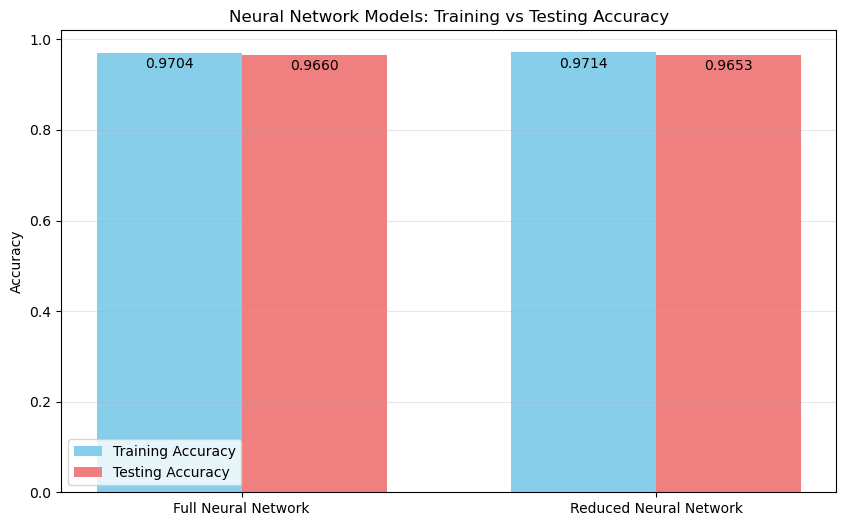

In [40]:
# 1. Plot training vs testing accuracy comparison
models = ['Full Neural Network', 'Reduced Neural Network']
train_accuracies = [train_accuracy_nn, train_accuracy_nn_reduced]
test_accuracies = [test_accuracy_nn, test_accuracy_nn_reduced]
plt.figure(figsize=(10, 6))
x = np.arange(len(models))
width = 0.35
plt.bar(x - width/2, train_accuracies, width, label='Training Accuracy', color='skyblue')
plt.bar(x + width/2, test_accuracies, width, label='Testing Accuracy', color='lightcoral')

# Add accuracy values directly on the bars
for i, v in enumerate(train_accuracies):
    plt.text(i - width/2, v * 0.99, f'{v:.4f}', ha='center', va='top')
    
for i, v in enumerate(test_accuracies):
    plt.text(i + width/2, v * 0.99, f'{v:.4f}', ha='center', va='top')

plt.ylabel('Accuracy')
plt.title('Neural Network Models: Training vs Testing Accuracy')
plt.xticks(x, models)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.savefig('neural_network_accuracy_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

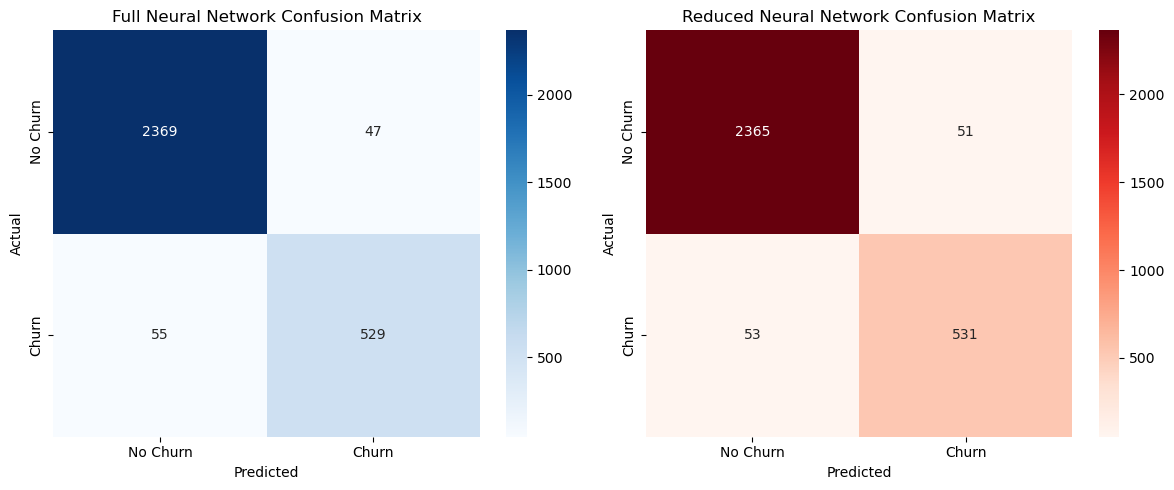

In [42]:
# 3. Create confusion matrices for visual comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Full neural network confusion matrix
cm1 = confusion_matrix(y_test, y_test_pred_nn)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Full Neural Network Confusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')
ax1.set_xticklabels(['No Churn', 'Churn'])
ax1.set_yticklabels(['No Churn', 'Churn'])

# Reduced neural network confusion matrix
cm2 = confusion_matrix(y_test, y_test_pred_nn_reduced)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Reds', ax=ax2)
ax2.set_title('Reduced Neural Network Confusion Matrix')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')
ax2.set_xticklabels(['No Churn', 'Churn'])
ax2.set_yticklabels(['No Churn', 'Churn'])

plt.tight_layout()
plt.savefig('neural_network_confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

In [44]:
# 4. Generate classification reports for both neural network models
from sklearn.metrics import classification_report

# Full model classification report
print("\nClassification Report - Full Neural Network Model:")
print(classification_report(y_test, y_test_pred_nn, target_names=['No Churn', 'Churn']))

# Reduced model classification report
print("\nClassification Report - Reduced Neural Network Model:")
print(classification_report(y_test, y_test_pred_nn_reduced, target_names=['No Churn', 'Churn']))



Classification Report - Full Neural Network Model:
              precision    recall  f1-score   support

    No Churn       0.98      0.98      0.98      2416
       Churn       0.92      0.91      0.91       584

    accuracy                           0.97      3000
   macro avg       0.95      0.94      0.95      3000
weighted avg       0.97      0.97      0.97      3000


Classification Report - Reduced Neural Network Model:
              precision    recall  f1-score   support

    No Churn       0.98      0.98      0.98      2416
       Churn       0.91      0.91      0.91       584

    accuracy                           0.97      3000
   macro avg       0.95      0.94      0.94      3000
weighted avg       0.97      0.97      0.97      3000



In [46]:
# 5. Extract classification metrics for visualization
def get_metrics_from_report(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    precision_0 = report['0']['precision']
    recall_0 = report['0']['recall']
    f1_0 = report['0']['f1-score']
    precision_1 = report['1']['precision']
    recall_1 = report['1']['recall']
    f1_1 = report['1']['f1-score']
    accuracy = report['accuracy']
    return [precision_0, recall_0, f1_0, precision_1, recall_1, f1_1, accuracy]

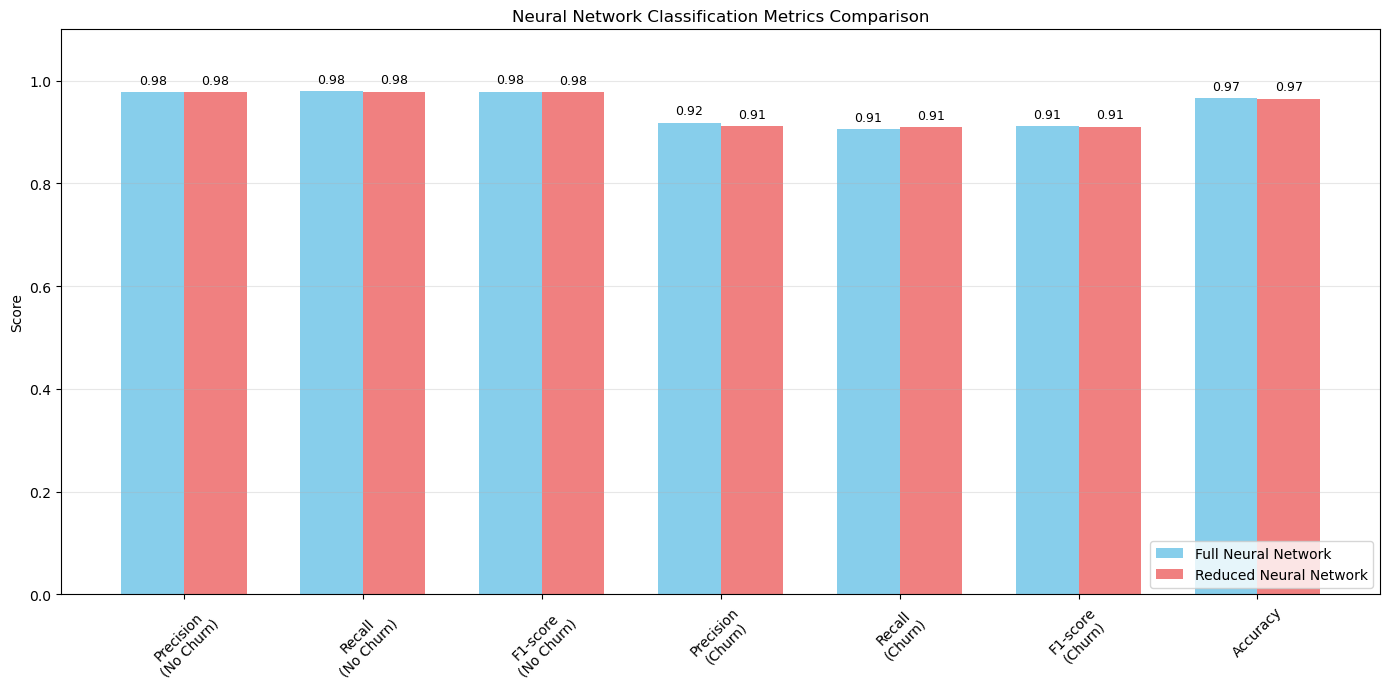

In [48]:
# Get metrics for both models
metrics_nn = get_metrics_from_report(y_test, y_test_pred_nn)
metrics_nn_reduced = get_metrics_from_report(y_test, y_test_pred_nn_reduced)

# Create a metrics comparison chart
metrics_names = ['Precision\n(No Churn)', 'Recall\n(No Churn)', 'F1-score\n(No Churn)', 
                'Precision\n(Churn)', 'Recall\n(Churn)', 'F1-score\n(Churn)', 'Accuracy']

plt.figure(figsize=(14, 7))
x = np.arange(len(metrics_names))
width = 0.35

plt.bar(x - width/2, metrics_nn, width, label='Full Neural Network', color='skyblue')
plt.bar(x + width/2, metrics_nn_reduced, width, label='Reduced Neural Network', color='lightcoral')

# Add values on top of bars
for i, v in enumerate(metrics_nn):
    plt.text(i - width/2, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=9)
    
for i, v in enumerate(metrics_nn_reduced):
    plt.text(i + width/2, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=9)

plt.ylabel('Score')
plt.title('Neural Network Classification Metrics Comparison')
plt.xticks(x, metrics_names, rotation=45)
plt.ylim(0, 1.1)
plt.legend(loc='lower right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('neural_network_classification_metrics.png', dpi=300, bbox_inches='tight')
plt.show()

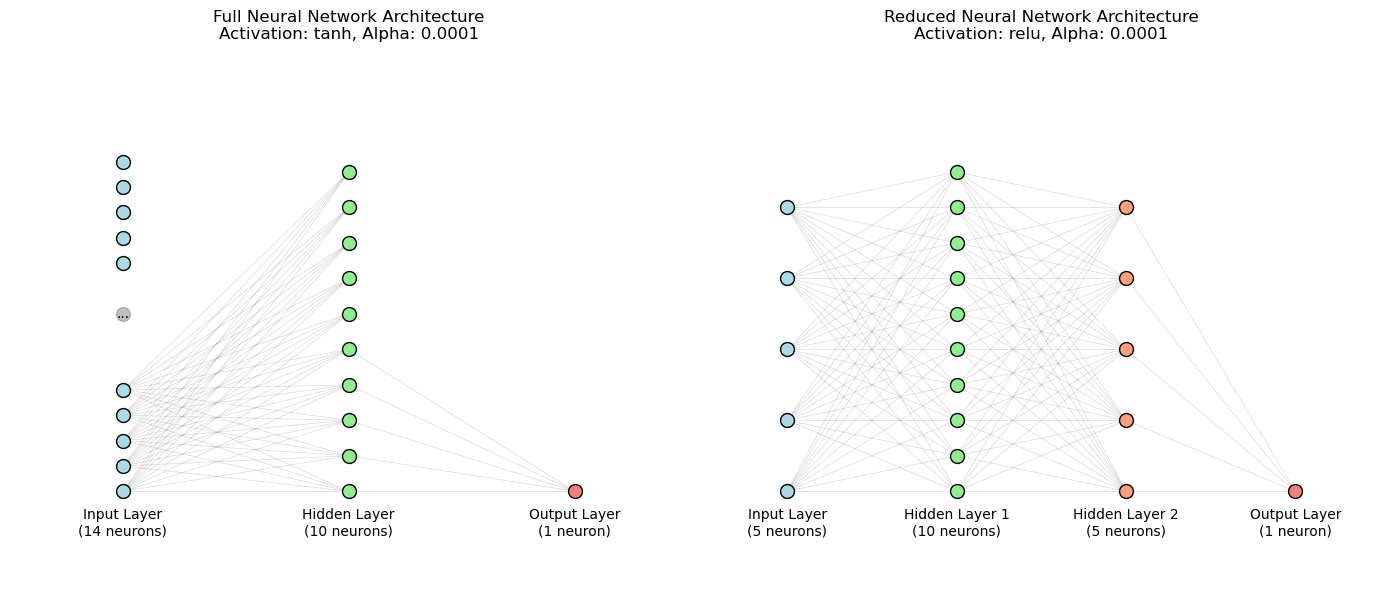

In [50]:
# 6. Neural Network Architecture Visualization
# Create a visual representation of both network architectures
plt.figure(figsize=(14, 6))

# Full Neural Network Architecture
plt.subplot(1, 2, 1)
nn_layers = [X_train.shape[1], nn_best.hidden_layer_sizes[0], 1]
nn_colors = ['lightblue', 'lightgreen', 'lightcoral']

# Plot layers
for i, (layer_size, color) in enumerate(zip(nn_layers, nn_colors)):
    x = i
    for j in range(layer_size):
        if layer_size > 10 and j > 4 and j < layer_size - 5:
            if j == 5:
                plt.scatter(x, 0, s=100, color='gray', alpha=0.5)
                plt.text(x, 0, "...", ha='center', va='center')
            continue
        y = (j - layer_size/2) / (layer_size/2) * 0.8
        plt.scatter(x, y, s=100, color=color, edgecolor='black', zorder=2)
    
    # Add layer labels
    if i == 0:
        plt.text(x, -1, f"Input Layer\n({layer_size} neurons)", ha='center')
    elif i == len(nn_layers) - 1:
        plt.text(x, -1, f"Output Layer\n({layer_size} neuron)", ha='center')
    else:
        plt.text(x, -1, f"Hidden Layer\n({layer_size} neurons)", ha='center')
    
    # Add connections (only a few for clarity)
    if i < len(nn_layers) - 1:
        next_layer_size = nn_layers[i+1]
        for j in range(min(layer_size, 5)):
            y1 = (j - layer_size/2) / (layer_size/2) * 0.8
            if next_layer_size > 10:
                for k in range(5):
                    y2 = (k - next_layer_size/2) / (next_layer_size/2) * 0.8
                    plt.plot([x, x+1], [y1, y2], 'gray', alpha=0.3, linewidth=0.5, zorder=1)
            else:
                for k in range(next_layer_size):
                    y2 = (k - next_layer_size/2) / (next_layer_size/2) * 0.8
                    plt.plot([x, x+1], [y1, y2], 'gray', alpha=0.3, linewidth=0.5, zorder=1)

plt.title(f"Full Neural Network Architecture\nActivation: {nn_best.activation}, Alpha: {nn_best.alpha}")
plt.xlim(-0.5, len(nn_layers) - 0.5)
plt.ylim(-1.2, 1.2)
plt.axis('off')

# Reduced Neural Network Architecture
plt.subplot(1, 2, 2)
reduced_nn_layers = [5, nn_reduced_best.hidden_layer_sizes[0], nn_reduced_best.hidden_layer_sizes[1], 1]
reduced_nn_colors = ['lightblue', 'lightgreen', 'lightsalmon', 'lightcoral']

# Plot layers
for i, (layer_size, color) in enumerate(zip(reduced_nn_layers, reduced_nn_colors)):
    x = i
    for j in range(layer_size):
        y = (j - layer_size/2) / (layer_size/2) * 0.8
        plt.scatter(x, y, s=100, color=color, edgecolor='black', zorder=2)
    
    # Add layer labels
    if i == 0:
        plt.text(x, -1, f"Input Layer\n({layer_size} neurons)", ha='center')
    elif i == len(reduced_nn_layers) - 1:
        plt.text(x, -1, f"Output Layer\n({layer_size} neuron)", ha='center')
    else:
        plt.text(x, -1, f"Hidden Layer {i}\n({layer_size} neurons)", ha='center')
    
    # Add connections
    if i < len(reduced_nn_layers) - 1:
        next_layer_size = reduced_nn_layers[i+1]
        for j in range(layer_size):
            y1 = (j - layer_size/2) / (layer_size/2) * 0.8
            for k in range(next_layer_size):
                y2 = (k - next_layer_size/2) / (next_layer_size/2) * 0.8
                plt.plot([x, x+1], [y1, y2], 'gray', alpha=0.3, linewidth=0.5, zorder=1)

plt.title(f"Reduced Neural Network Architecture\nActivation: {nn_reduced_best.activation}, Alpha: {nn_reduced_best.alpha}")
plt.xlim(-0.5, len(reduced_nn_layers) - 0.5)
plt.ylim(-1.2, 1.2)
plt.axis('off')

plt.tight_layout()
plt.show()

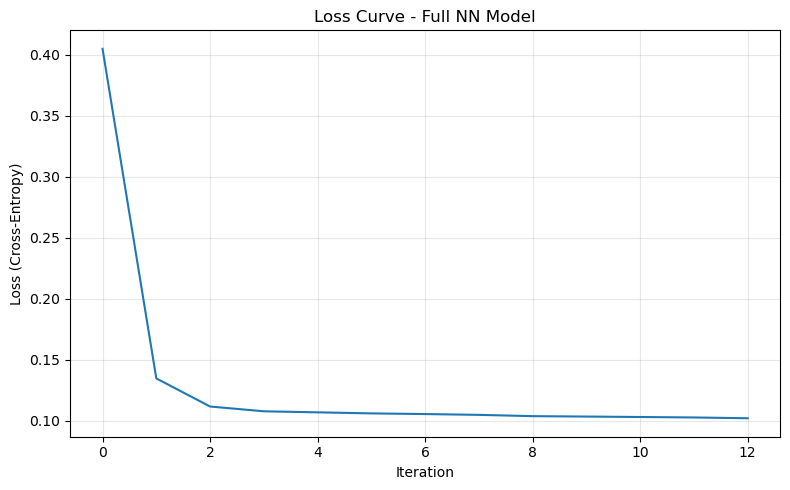

In [52]:
# Plot loss curve for the full model
plt.figure(figsize=(8, 5))
plt.plot(nn_best.loss_curve_)
plt.title('Loss Curve - Full NN Model')
plt.xlabel('Iteration')
plt.ylabel('Loss (Cross-Entropy)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('full_nn_loss_curve.png', dpi=300) # Save for report
plt.show()

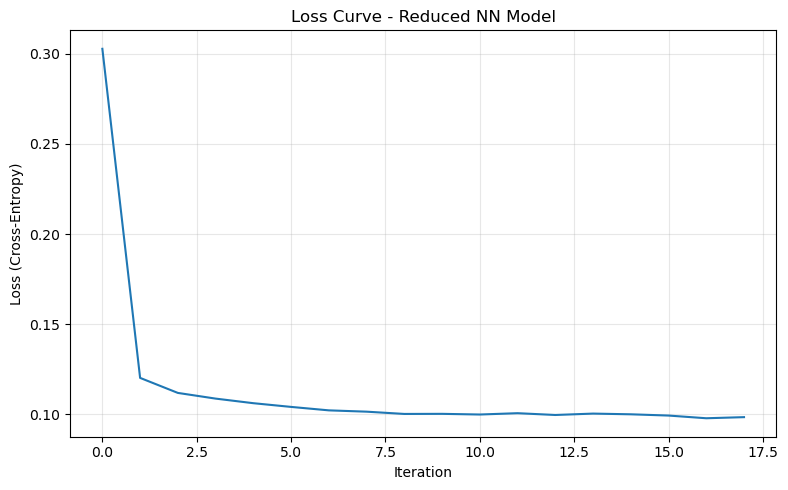

In [54]:
# Plot loss curve for the reduced model
plt.figure(figsize=(8, 5))
plt.plot(nn_reduced_best.loss_curve_)
plt.title('Loss Curve - Reduced NN Model')
plt.xlabel('Iteration')
plt.ylabel('Loss (Cross-Entropy)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('reduced_nn_loss_curve.png', dpi=300) # Save for report
plt.show()

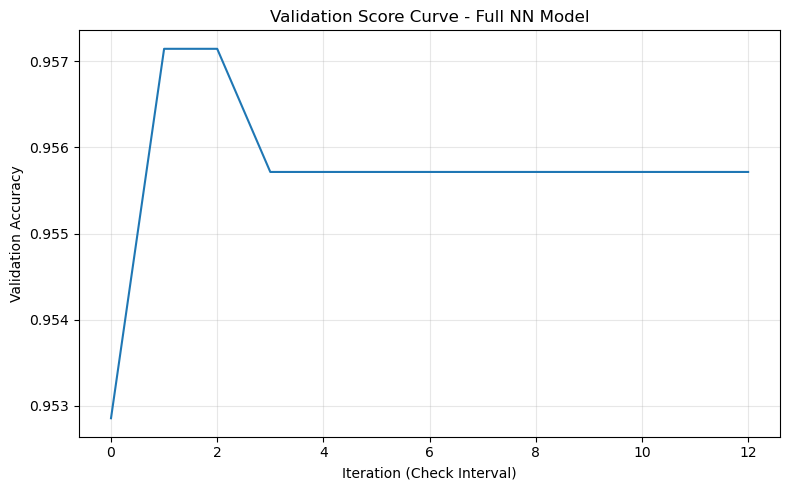

In [56]:
# Check if validation scores exist for full model
if hasattr(nn_best, 'validation_scores_'):
    plt.figure(figsize=(8, 5))
    plt.plot(nn_best.validation_scores_)
    plt.title('Validation Score Curve - Full NN Model')
    plt.xlabel('Iteration (Check Interval)')
    plt.ylabel('Validation Accuracy')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('full_nn_validation_curve.png', dpi=300) # Save for report
    plt.show()
else:
    print("Validation scores not available for full NN model (early_stopping might not have been True).")

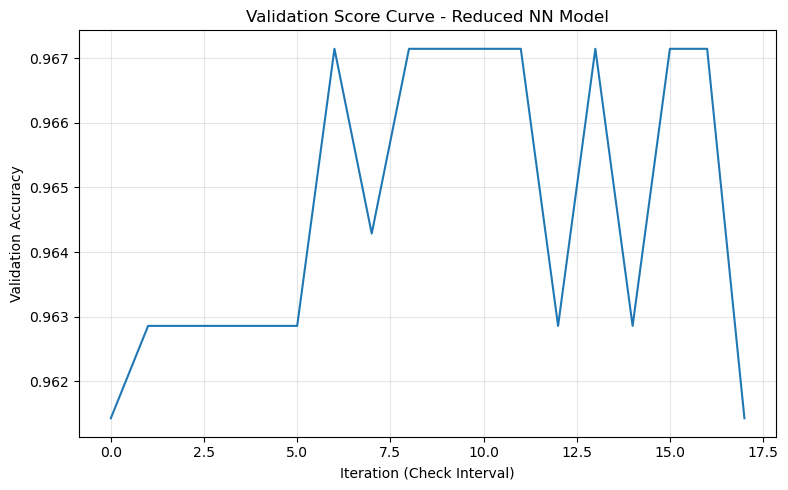

In [58]:
# Check if validation scores exist for reduced model
if hasattr(nn_reduced_best, 'validation_scores_'):
    plt.figure(figsize=(8, 5))
    plt.plot(nn_reduced_best.validation_scores_)
    plt.title('Validation Score Curve - Reduced NN Model')
    plt.xlabel('Iteration (Check Interval)')
    plt.ylabel('Validation Accuracy')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('reduced_nn_validation_curve.png', dpi=300) # Save for report
    plt.show()
else:
    print("Validation scores not available for reduced NN model (early_stopping might not have been True).")

In [62]:
# Calculate prediction probabilities
y_train_proba_nn = nn_best.predict_proba(X_train_scaled)[:, 1]
y_test_proba_nn = nn_best.predict_proba(X_test_scaled)[:, 1]
y_train_proba_nn_reduced = nn_reduced_best.predict_proba(X_train_reduced_scaled)[:, 1]
y_test_proba_nn_reduced = nn_reduced_best.predict_proba(X_test_reduced_scaled)[:, 1]

# Calculate ROC curve and AUC for both models (test set)
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_test_proba_nn)
fpr_nn_reduced, tpr_nn_reduced, _ = roc_curve(y_test, y_test_proba_nn_reduced)
auc_nn = auc(fpr_nn, tpr_nn)
auc_nn_reduced = auc(fpr_nn_reduced, tpr_nn_reduced)


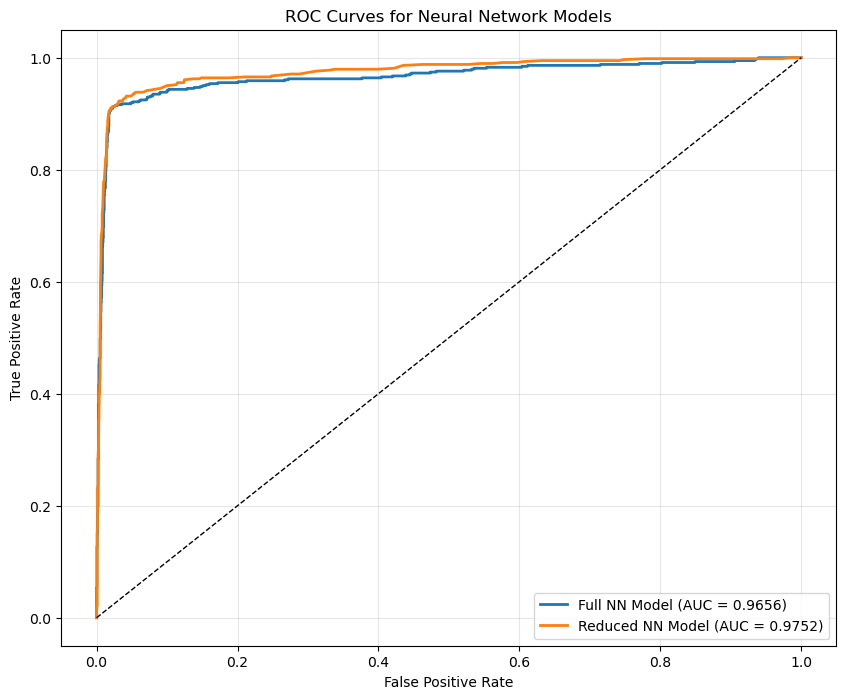

In [64]:
# Plot ROC curves for both neural network models
plt.figure(figsize=(10, 8))
plt.plot(fpr_nn, tpr_nn, label=f'Full NN Model (AUC = {auc_nn:.4f})', linewidth=2)
plt.plot(fpr_nn_reduced, tpr_nn_reduced, label=f'Reduced NN Model (AUC = {auc_nn_reduced:.4f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Neural Network Models')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

In [66]:
import pickle
from sklearn.metrics import roc_curve, auc # Ensure these are imported if needed here

# --- Save Both Neural Network Models in one list ---
# Structure: [[full_model, full_auc, full_fpr, full_tpr], [reduced_model, reduced_auc, reduced_fpr, reduced_tpr]]
nn_combined_data_to_save = [
    [nn_best, auc_nn, fpr_nn, tpr_nn],
    [nn_reduced_best, auc_nn_reduced, fpr_nn_reduced, tpr_nn_reduced]
]

with open('nn_combined_models.pickle', 'wb') as f_combined:
    pickle.dump(nn_combined_data_to_save, f_combined)
print("Combined NN models and ROC data saved to 'nn_combined_models.pickle'")

Combined NN models and ROC data saved to 'nn_combined_models.pickle'
